<a href="https://colab.research.google.com/github/seon0415/BPA-/blob/main/230319_6%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%B4%88%EB%B0%98_%EC%9D%B4%EC%83%81%EC%B9%98%2C_%EB%88%84%EB%9D%BD%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결측치(missing value)
- 누락된 값, 비어있는 값
- 왜 결측치가 생겼는가? 
- 휴먼에러, 진짜 결측일 수 있고, 결측치를 보고 그냥 넘어가기에는 데이터 분석가는 꼭 한 번 생각해야 한다.

- NA값으로 빈 값이라 할 수 있는 선택이 2가지 있다.

- 1. 날리기 NA날리기 - 그럼 무엇을 기준으로 날릴 것인가? 기준치가 있어야 한다.
- 2. NA값 채우기 - 어떻게 채울거야?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':[100,80,np.nan],
                  '등급':['A',np.nan,'B']})

In [ ]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [ ]:
#결측치 확인하는 법
df.isna().sum()

이름    0
성적    1
dtype: int64

### 결측치를 제거하는 방법은?
- df.dropna() 결측치가 있는 행을 제거, subset = 원하는 변수명을 적으면 된다.

In [ ]:
df.dropna(subset  = ['성적'], inplace=True) #원본을 바꾸려면 inplace 필수 사용!

In [ ]:
df.dropna() #전체 모든 na 값을 다 제거한다. 

,이름,성적,등급
0,홍길동,100.0,A


In [ ]:
df.성적.sum() #na값 제외하고 합쳐진다. 

180.0

In [ ]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [ ]:
df['성적']+100

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [ ]:
df.성적.mean() # na값 반영 안 했다.!!

90.0

- 숫자열 데이터 타입에서 nan 값은 계산 안 되고, 제외하고 계산한다.

In [ ]:
df.이름.value_counts().sum()

3

In [ ]:
df.등급.value_counts().sum() # 문자열데이터, 범주형데이터 NAn 값도 계산이 안 된다.

2

In [ ]:
df.shape # 전체 데이터프레임의 행과 열은 3,3 나오지만 실제 컬럼을 기준으로 들어가서 값을 계산시에는 NA값은 제외한다.

(3, 3)

In [ ]:
exam = pd.read_csv('exam.csv')

In [ ]:
exam.loc[[3,8,9,15],['english']] = np.nan #np.nan 넘파이에서 제공하는 함수 nan 값을 na로 바꿀 때 사용해

In [ ]:
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [ ]:
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,NaN,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,NaN,15
9,10,3,50,NaN,45


In [ ]:
exam.english.mean() # 이 평균은 ? na값을 반영 안 한거다.

81.625

In [ ]:
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,NaN,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,NaN,15
9,10,3,50,NaN,45


## na값을 대체하는 방법은 fillna()
- fillna()를 사용하면 대체하는 값을 넣을 수 있다.

- 결측치에 대해서 0을 집어 넣는 경우

In [ ]:
exam['english'] = exam['english'].fillna(0)

In [ ]:
exam.english.mean()

65.3

- 바로 결측치를 0으로 대체하면 기존 81.625 (na값이 제외) 0으로 대체하면 평균이 65.3
- 머신러닝 학습할 때 이 차이만큼 중요도 생각할 수 있다.
- 이런 결측치를 대처할 때 도메인 지식과, 분석가의 판단이 필요하다.
- exam 영어가 결측치라도 0점은 아닐 것이라 판단
- 이 결측치를 최대한 어떻게 대체해서 머신에게 학습하냐에 따라 머신러닝의 평가지표가 달라질 수 있다.

In [ ]:
exam['english'] = exam['english'].fillna(81.6)

In [ ]:
exam.english.mean()

81.62

## 이상치 (anomaly)
- 이상치도 생각할 때 2가지로 봐야한다.
- 진짜 정상적인 이상치일 수 있고
- 말도 안되는 논리적으로 봤을 때 말도 안되는 값일 수 있다.

- 고객 장바구니 데이터를 보는 데 주문 금액이 마이너스인 경우 , 반품의 경우는 마이너스 일 수 있다.
- 이상치도 결국 분석가가 판단을 잘 해야 하는데, 도메인 지식이 정말 중요하다.

- 이상치는 무엇을 기준으로 이상치로 보는가?

- IQR, 분석가가 직접 특정값은 이상치라고 판단 가능하다.
- 이상치 판단은 통계적인 방법은 IQR을 사용한다.
- 분석가가 주관적으로 판단하여 이상치를 판단한다.

- IQR boxplot 확인하기

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
import seaborn as sns

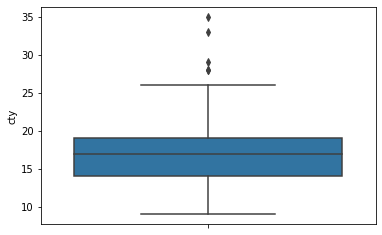

In [ ]:
sns.boxplot(data=mpg,y='cty') #숫자형데이터만 확인이 가능하다.

- 상자 아래 세로선 극단치 경계 (이상치를 판단하는 기준)
- 그 위에 l 아랫수염 0~25% 내에 해당하는 값
- 네모난 상자의 밑면 1사분위수 Q1 (하위 25% 위치 값)
- 네모난 상자 안의 선은 2사분위수 Q2( 중앙값 50%)
- 네모난 상자 위의 면은 3사분위수 Q3( 하위 75% 값)
- 윗수염은 75~100% 위치하는 값
- 극단치 경계 맨 위 기준
- 상자 밖의 점들이 극단치  ( Q1, Q3 밖 1.5 IQR 넘어간 값)

### IQR 극단치 기준값 구해보기!
- 분위수를 만들어야 함
- quantile() 사용

In [ ]:
p25 = mpg['cty'].quantile(0.25)

In [ ]:
p25

14.0

In [ ]:
p75 = mpg['cty'].quantile(0.75)

In [ ]:
p75

19.0

iqr은 1사분위수와 3사분위수의 거리를 나타낸 것 

In [ ]:
iqr = p75- p25 

In [ ]:
iqr

5.0

- IQR이 나오는 공식
- Q1, Q3 이용해서 만든다.

- 아래 하한선은 p25 - 1.5*iqr
- 위의 상한선은 p75 + 1.5*iqr

In [ ]:
p25 - 1.5*iqr # 아래 하한선

6.5

In [ ]:
p75 + 1.5*iqr # 위의 상한선

26.5

In [ ]:
np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5))

(array([ 99, 196, 212, 221, 222]),)

In [ ]:
mpg['cty']=np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5), np.nan, mpg['cty'])

In [ ]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [ ]:
mpg_1=mpg.dropna()

In [ ]:
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

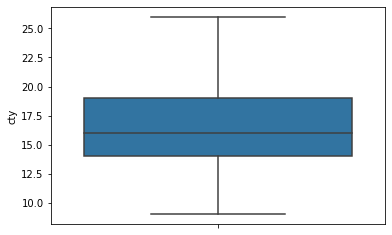

In [ ]:
sns.boxplot(data=mpg_1,y='cty')

In [ ]:
mpg_1.cty.mean() #이상치 제거 후

16.558951965065503

In [ ]:
mpg.cty.mean() #이상치 제거 전

16.858974358974358

- 전처리를 다 진행한 후에 모델링을 진행할 때 이런 작은 차이들이 실제 모델링에서는 큰 영향을 줄 수 있다.
- 스케일링 등의 진행을 하는 이유도 -> 데이터에 대한 편차를 최소화해서 모델에게 학습시키 위함

### loc iloc
- 기존에 배울 때 컬럼을 이용해서 추출

In [ ]:
mpg['cty'] #컬럼을 이용해서 추출

0      18
1      21
2      20
3      21
4      16
       ..
229    19
230    21
231    16
232    18
233    17
Name: cty, Length: 234, dtype: int64

### 행단위 추출을 할 경우?
- query는 조건문을 이용해서 추출하는 것
- loc, iloc은 인덱스 기준으로 추출하는 것

- loc : 인덱스 기준으로 행 데이터 추출
- iloc : 행 번호 기준으로 행 데이터 추출

In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
mpg.loc[0] #인덱스기준 값 추출

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [ ]:
mpg.loc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


- iloc은?

In [ ]:
mpg.iloc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [ ]:
mpg.iloc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


loc과 iloc 비교

In [ ]:
mpg_sp =mpg.loc[[0,2,4,6,8]]

In [ ]:
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [ ]:
mpg_sp.loc[4] #인덱스기준 
# loc은 인덱스의 값을 기준으로 지정할 수 있다. 
# loc 지정된 인덱스 번호 기준으로 가져온다.

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [ ]:
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [ ]:
mpg_sp.iloc[6] #iloc 행 번호 순서를 넘어가면 안 된다.

IndexError: single positional indexer is out-of-bounds

- 현재 데이터프레임에 순서를 기반으로 ( 행 순서 기반으로 출력된다. )

In [ ]:
mpg_sp.loc[6]

manufacturer        audi
model                 a4
displ                3.1
year                2008
cyl                    6
trans           auto(av)
drv                    f
cty                   18
hwy                   27
fl                     p
category         compact
Name: 6, dtype: object

In [ ]:
for i in range(10):
    print(mpg.loc[i])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object
manufacturer          audi
model                   a4
displ                  1.8
year                  1999
cyl                      4
trans           manual(m5)
drv                      f
cty                     21
hwy                     29
fl                       p
category           compact
Name: 1, dtype: object
manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object
manufacturer        audi
model                 a4
displ       

### 필수과제 1
- 타이타닉 데이터를 가지고 IQR 값을 계산해 주시고, 제거 전과 후에 대한 통계치를 비교 분석해 주세요.
- IQR을 사용하려면 수치형데이터

### 복습과제는 mpg, exam 데이터를 가지고 진행

sns